Линейная регрессия:

Метод наименьших квадратов:
$f(a,b)=\sum^N_{i=1}{(y_i-(ax_i+b))^2}\rightarrow min$

$z = (y_i-(ax_i+b))^2$


$(z^2)'=2z$

\begin{equation}

\begin{cases}
\frac{\delta F}{\delta a} = 0  \\
\frac{\delta F}{\delta b} = 0
\end{cases} \Rightarrow

\begin{cases}
\sum^N_{i=1}(y_i-(ax_i+b))x_i=0 \\
\sum^N_{i=1}(y_i-(ax_i+b))=0
\end{cases} \Rightarrow (раскрытие скобок)

\begin{cases}
\sum^N_{i=1}y_ix_i-a\sum^N_{i=1}x_i^2-b\sum^N_{i=1}x_i=0 \\
\sum^N_{i=1}y_i-a\sum^N_{i=1}x_i-bN=0
\end{cases}

\end{equation}

$$S_x=\sum^N_{i=1}x_i, S_y=\sum^N_{i=1}y_i, S_{x^2}=\sum^N_{i=1}x^2_i, S_{xy}=\sum^N_{i=1}x_iy_i$$

\begin{equation}

\begin{cases}
S_{xy}-aS_{x^2}-bS_x=0 \\
S_y-aS_x-bN=0
\end{cases}

\end{equation}

$$b = \frac{S_y-aS_x}{N}$$

$$ S_{xy}-aS_{x^2}- \frac{S_x(S_y-aS_x)}{N}=0$$
$$ NS_{xy}-NaS_{x^2}- S_xS_y-aS_x^2 =0 $$ 
$$ a(NS_{x^2}-S_x^2)=NS_{xy}-S_xS_y$$
$$ a = \frac{NS_{xy} - S_xS_y}{NS_{x^2}-S^2_{x} $$
$$ y = (\frac{N\sum x_iy_i-\sum x_i\sum y_i}{N\sum x_i^2-(\sum x_i)^2})x+(\frac{\sum y_i-(\frac{N\sum x_iy_i-\sum x_i \sum y_i}{N\sum x_i^2-(\sum x_i)^2}\sum x_i)}{N})$$

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [83]:
days = np.array(range(1, 11))
print(days)
views = np.array([5252, 7620, 941, 1159, 485, 299, 239, 195, 181, 180])
print(views)
downloads = np.array([21, 46, 9, 8, 3, 6, 4, 2, 2, 2])
print(downloads)

[ 1  2  3  4  5  6  7  8  9 10]
[5252 7620  941 1159  485  299  239  195  181  180]
[21 46  9  8  3  6  4  2  2  2]


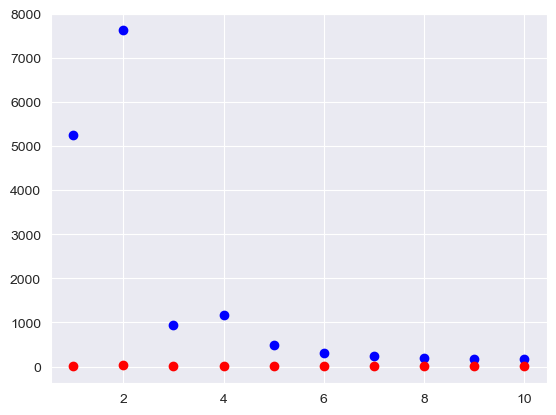

In [84]:
plt.plot(days, views, 'bo', days, np.array(downloads), 'ro')

Text(0, 0.5, 'number of persons')

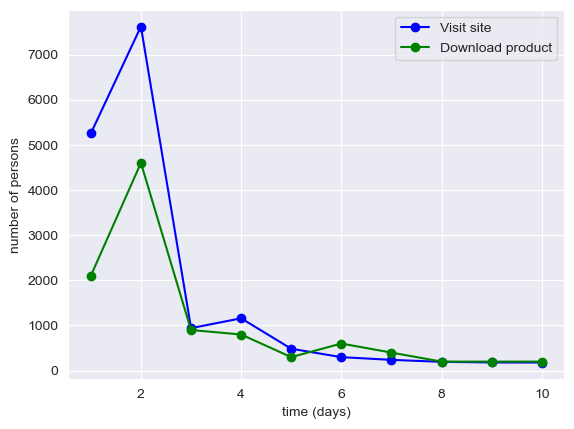

In [85]:
plt.plot(days, views, 'bo-')
plt.plot(days, 100 * downloads, 'go-')
plt.legend(['Visit site', 'Download product'], loc='upper right')
plt.xlabel('time (days)')
plt.ylabel('number of persons')

## 1. Коэффициент корреляции
Коэффициент корреляции (r) равен частному ковариации случайных величин на произведение их среднеквадратичных отклонений. Записывается следующей формулой:
$$ r={cov(x,y)\over{σ_x σ_y}}, $$
или же $$ r={\sum_{i=0}^{N-1}{(x_i-M(x))(y_i-M(y))}\over\sqrt{D_x}\sqrt{D_y}} $$

$M({\displaystyle \xi })$ - математическое ожидание случайной величины $\xi$. В нашем случае, рассчитывается по формуле: $$M(\xi)=\sum_{i=0}^{N-1}{\xi_i}*1/N$$

Дисперсия ($D$) случайной величины определяется формулой: $$D_x={\sum_i^n(x_i - M_x)^2}.$$

Формула прямой для метода наименьших квадратов:
$$y = (\frac{N\sum x_iy_i-\sum x_i\sum y_i}{N\sum x_i^2-(\sum x_i)^2})x+(\frac{\sum y_i-(\frac{N\sum x_iy_i-\sum x_i \sum y_i}{N\sum x_i^2-(\sum x_i)^2}\sum x_i)}{N})$$

In [86]:
class LeastSquaresRegression:
    def __init__(self, days, views, downloads):
        """Конструктор класса, инициализирующий исходные данные."""
        self.days = np.array(days)
        self.views = np.array(views)
        self.downloads = np.array(downloads)
    
    def mean(self, values):
        """Вычисляет среднее значение списка чисел."""
        return sum(values) / len(values)

    def variance(self, values, mean_value):
        """Вычисляет дисперсию - среднеквадратичное отклонение значений относительно среднего.
        Чем больше дисперсия, тем сильнее разброс данных относительно их среднего значения."""
        return sum((x - mean_value) ** 2 for x in values) / len(values)

    def covariance(self, x, y, mean_x, mean_y):
        """Вычисляет ковариацию - меру совместного изменения двух переменных.
        Если ковариация положительная, переменные изменяются в одном направлении,
        если отрицательная - в противоположных."""
        return sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))) / len(x)
    
    def correlation(self, x, y):
        """Вычисляет коэффициент корреляции - нормированную меру линейной зависимости между двумя переменными.
        Принимает значения от -1 до 1: 
        - 1 означает сильную положительную зависимость,
        - -1 означает сильную отрицательную зависимость,
        - 0 означает отсутствие линейной зависимости."""
        mean_x, mean_y = self.mean(x), self.mean(y)
        return self.covariance(x, y, mean_x, mean_y) / ((self.variance(x, mean_x) * self.variance(y, mean_y)) ** 0.5)

    def least_squares(self, x, y):
        """Метод наименьших квадратов для нахождения коэффициентов линейной регрессии.
        Он минимизирует сумму квадратов отклонений фактических значений от предсказанных,
        подбирая оптимальные коэффициенты a и b для линейной модели: y = a + bx"""
        x = np.array(x)  # Преобразуем в массив NumPy
        y = np.array(y)  # Преобразуем в массив NumPy
        N = len(x)
        sum_x = np.sum(x)
        sum_y = np.sum(y)
        sum_xy = np.sum(x * y)  # Теперь работает корректно
        sum_x2 = np.sum(x ** 2)  # Теперь работает корректно
        
        b = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)  # Коэффициент наклона
        a = (sum_y - b * sum_x) / N  # Пересечение с осью Y
        
        return a, b

    def plot_graphs(self):
        """Строит графики линейной регрессии."""
        a, b = self.least_squares(self.views, self.downloads)
        print(f"Коэффициенты прямой: a - {a:.2f}, b - {b:.2f}")
        plt.scatter(self.views, self.downloads, label='Исходные данные')
        plt.plot(self.views, [a + b * x for x in self.views], color='red', label='Линейная регрессия y = 1.79x + 0.01')
        plt.xlabel('Посещения сайта')
        plt.ylabel('Скачивания')
        plt.legend()
        plt.grid()
        plt.title('Регрессия: посещения -> скачивания')
        plt.show()
        
        # a2, b2 = self.least_squares(self.days, self.downloads)
        # plt.scatter(self.days, self.downloads, label='Исходные данные')
        # plt.plot(self.days, [a2 + b2 * x for x in self.days], color='blue', label='Линейная регрессия')
        # plt.xlabel('Дни')
        # plt.ylabel('Скачивания')
        # plt.legend()
        # plt.grid()
        # plt.title('Регрессия: дни -> скачивания')
        # plt.show()
        

## Подготовка данных:

In [87]:
days = range(1, 11)
views = [5252, 7620, 941, 1159, 485, 299, 239, 195, 181, 180]
downloads = [21, 46, 9, 8, 3, 6, 4, 2, 2, 2]

## Инициализация класса, подготовка данных:

In [88]:
regression = LeastSquaresRegression(days, views, downloads)

mean_views = regression.mean(views)
mean_downloads = regression.mean(downloads)
var_views = regression.variance(views, mean_views)
var_downloads = regression.variance(downloads, mean_downloads)
corr_views_downloads = regression.correlation(views, downloads)

## Вывод основных данных:

In [89]:
print(f'Среднее посещений: {mean_views:.2f}, Среднее скачиваний: {mean_downloads:.2f}')
print(f'Дисперсия посещений: {var_views:.2f}, Дисперсия скачиваний: {var_downloads:.2f}')
print(f'Коэффициент корреляции: {corr_views_downloads:.2f}')

Среднее посещений: 1655.10, Среднее скачиваний: 10.30
Дисперсия посещений: 6096803.89, Дисперсия скачиваний: 171.41
Коэффициент корреляции: 0.97


## Построение графиков:

Коэффициенты прямой: a - 1.79, b - 0.01


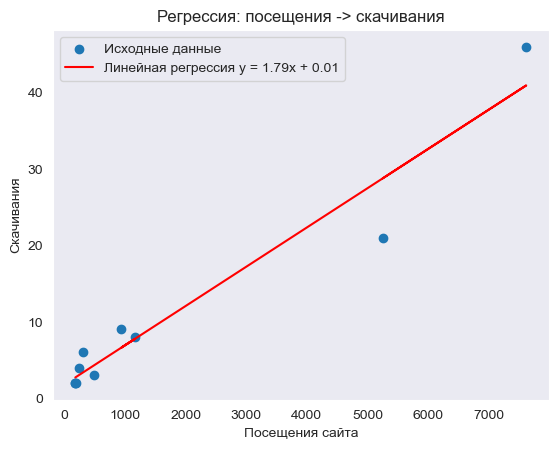

In [90]:
regression.plot_graphs()

## Подготовка и вывод результатов предсказаний:

In [91]:
a1, b1 = regression.least_squares(regression.views, regression.downloads)

x_pred_8000 = 8000
y_pred_8000 = a1 + b1 * x_pred_8000
print(f'Прогноз для 8000 посещений: {y_pred_8000:.2f} скачиваний')

y_pred_500 = 500
x_pred_500 = (y_pred_500 - a1) / b1
print(f'Для 500 скачиваний требуется примерно {x_pred_500:.2f} посещений')

Прогноз для 8000 посещений: 42.91 скачиваний
Для 500 скачиваний требуется примерно 96921.70 посещений
